# Text Data Analytics

## Womens Clothing E-Commerce Reviews dataset

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [3]:
df.dropna(inplace=True)
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


### Making wordcloud 

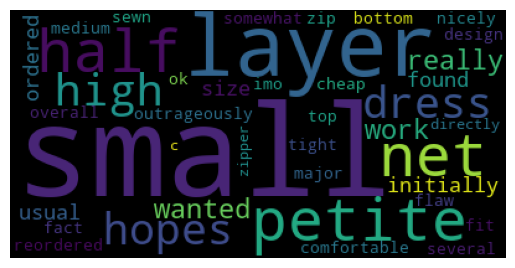

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# using one review

text = df['Review Text'][2]
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

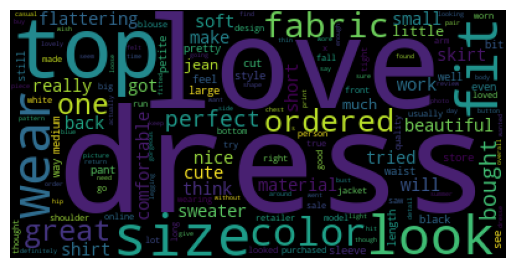

In [5]:
# using all reviews

text = ' '
for rev in df['Review Text']:
    text = text + ' ' + str(rev)
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

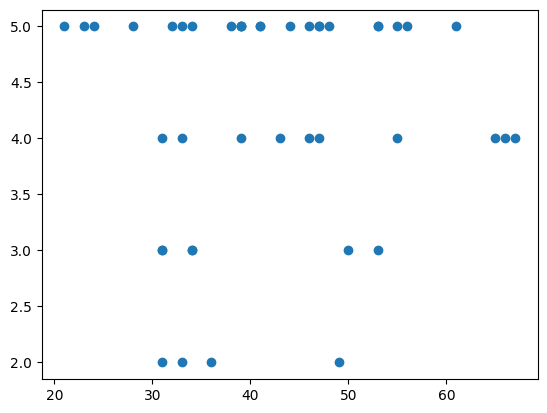

In [7]:
#Finding if any correlation exists between age and ratings

x = df['Age'][2:45]
y = df['Rating'][2:45]
plt.scatter(x, y)
plt.show()

### Finding top 10 words using tf-idf

In [8]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Review Text'][2:500])
features = vectorizer.get_feature_names_out()
indices = np.argsort(vectorizer.idf_)[::-1]

top_features = [features[i] for i in indices[:10]]
score_of_top_feature =  [vectorizer.idf_[i] for i in indices[:10]]

print ('Top 10 Feature=',top_features)
print('Tf-idf score=',score_of_top_feature)

Top 10 Feature= ['ã¼ber', 'popular', 'positioned', 'embossed', 'possibilities', 'possible', 'embellishment', 'postpartum', 'emb', 'elongate']
Tf-idf score= [6.519458915191573, 6.519458915191573, 6.519458915191573, 6.519458915191573, 6.519458915191573, 6.519458915191573, 6.519458915191573, 6.519458915191573, 6.519458915191573, 6.519458915191573]


### Applying LDA on the number the 'review text' column, finding various topics and visualising it

In [9]:
import gensim
import gensim.corpora as corpora
from pprint import pprint
from gensim.models.ldamulticore import LdaMulticore

data = df['Review Text']
tocken_data = []
for review in data:
    tockens = review.split()
    tocken_data.append(tockens)
print(tocken_data[0:2])

[['I', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress', 'and', 'really', 'wanted', 'it', 'to', 'work', 'for', 'me.', 'i', 'initially', 'ordered', 'the', 'petite', 'small', '(my', 'usual', 'size)', 'but', 'i', 'found', 'this', 'to', 'be', 'outrageously', 'small.', 'so', 'small', 'in', 'fact', 'that', 'i', 'could', 'not', 'zip', 'it', 'up!', 'i', 'reordered', 'it', 'in', 'petite', 'medium,', 'which', 'was', 'just', 'ok.', 'overall,', 'the', 'top', 'half', 'was', 'comfortable', 'and', 'fit', 'nicely,', 'but', 'the', 'bottom', 'half', 'had', 'a', 'very', 'tight', 'under', 'layer', 'and', 'several', 'somewhat', 'cheap', '(net)', 'over', 'layers.', 'imo,', 'a', 'major', 'design', 'flaw', 'was', 'the', 'net', 'over', 'layer', 'sewn', 'directly', 'into', 'the', 'zipper', '-', 'it', 'c'], ['I', 'love,', 'love,', 'love', 'this', 'jumpsuit.', "it's", 'fun,', 'flirty,', 'and', 'fabulous!', 'every', 'time', 'i', 'wear', 'it,', 'i', 'get', 'nothing', 'but', 'great', 'compliments!']]


In [10]:
dictionary = corpora.Dictionary(tocken_data)
print("Dictionary: ", dictionary)
term_freq_corpus = [dictionary.doc2bow(text) for text in tocken_data]
print("Term Frequency corpus : ",term_freq_corpus[0:2])
print(type(term_freq_corpus))

Dictionary:  Dictionary<36331 unique tokens: ['(my', '(net)', '-', 'I', 'a']...>
Term Frequency corpus :  [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 3), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 2), (22, 2), (23, 1), (24, 1), (25, 4), (26, 1), (27, 2), (28, 1), (29, 1), (30, 4), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 5), (58, 2), (59, 1), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 3), (68, 1), (69, 1), (70, 1), (71, 1)], [(3, 1), (5, 1), (8, 1), (25, 2), (58, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1)]]
<class 'list'>


In [11]:
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=term_freq_corpus, id2word=dictionary, num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[term_freq_corpus]

[(0,
  '0.054*"the" + 0.046*"i" + 0.041*"it" + 0.027*"a" + 0.027*"and" + 0.024*"is" '
  '+ 0.013*"this" + 0.013*"in" + 0.012*"but" + 0.010*"of"'),
 (1,
  '0.062*"the" + 0.040*"and" + 0.032*"it" + 0.027*"i" + 0.023*"is" + 0.022*"a" '
  '+ 0.017*"to" + 0.017*"this" + 0.014*"on" + 0.013*"in"'),
 (2,
  '0.054*"the" + 0.043*"i" + 0.033*"a" + 0.033*"and" + 0.019*"it" + 0.019*"in" '
  '+ 0.019*"is" + 0.017*"to" + 0.016*"this" + 0.012*"for"'),
 (3,
  '0.014*"and" + 0.014*"very" + 0.012*"with" + 0.009*"is" + 0.007*"a" + '
  '0.007*"this" + 0.007*"i" + 0.007*"love" + 0.007*"the" + 0.005*"it"'),
 (4,
  '0.042*"a" + 0.040*"the" + 0.033*"and" + 0.032*"i" + 0.029*"it" + 0.029*"to" '
  '+ 0.023*"is" + 0.013*"with" + 0.012*"this" + 0.012*"that"'),
 (5,
  '0.067*"the" + 0.045*"i" + 0.031*"a" + 0.026*"and" + 0.023*"it" + 0.019*"is" '
  '+ 0.015*"but" + 0.014*"to" + 0.013*"was" + 0.013*"in"'),
 (6,
  '0.035*"the" + 0.025*"and" + 0.022*"i" + 0.019*"is" + 0.018*"a" + 0.017*"to" '
  '+ 0.015*"it" + 0.012*"t

In [17]:
import pyLDAvis
import pyLDAvis.gensim_models
import pickle
import os

%matplotlib notebook

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model, corpus=term_freq_corpus, dictionary=dictionary)
pyLDAvis.save_html(vis, 'lda_visualization.html')
pyLDAvis.display(vis)